Text(0.5, 1.0, 'Magnetic Flux')

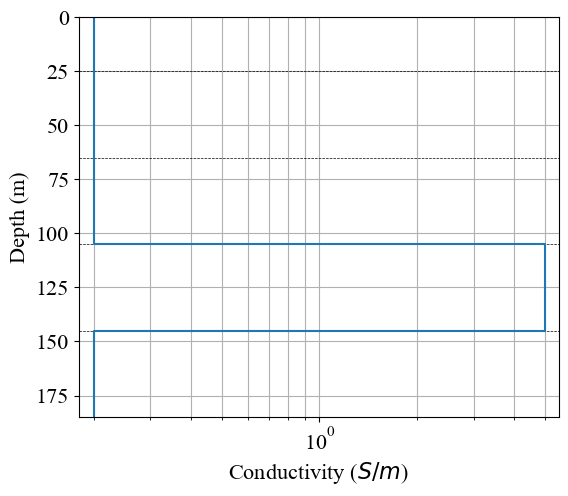

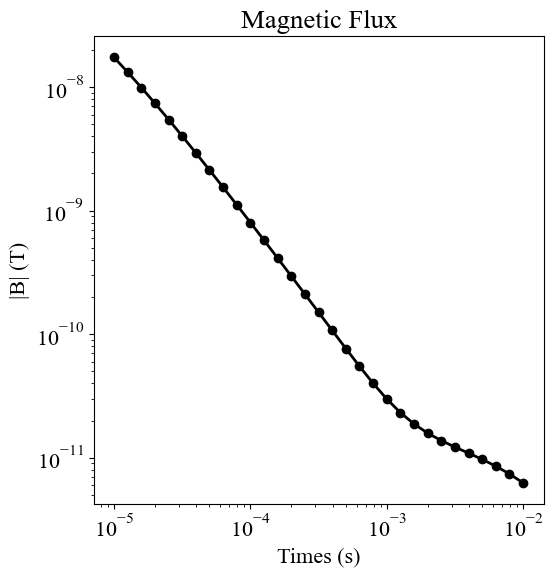

In [20]:
import numpy as np
import os
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
write_output = False
plt.rcParams.update({"font.size": 16})
source_location = np.array([0.0, 0.0, 1])
source_orientation = "z" 
source_current = 3.0  
source_radius = 10.0 
receiver_location = np.array([0.0, 0.0, 1])
receiver_orientation = "z" 
times = np.logspace(-5, -2, 31)  
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)
waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]
survey = tdem.Survey(source_list)
background_conductivity = 0.2
layer_conductivity = 5
layer2_conductivity = 0.2
thicknesses = np.array([25, 40.0, 40, 40])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[0] = layer2_conductivity
model[3] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
thicknesses_for_plotting = np.r_[thicknesses, 40.0]
fig = plt.figure(figsize=(6, 5))
plt.rcParams.update({
    "font.size": 16,
    "font.family": "Times New Roman"
})
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
plot_1d_layer_model(thicknesses_for_plotting, model, ax=ax,scale="log", show_layers=True)
ax.grid(which="both")
ax.set_xlabel(r"Conductivity ($S/m$)")
plt.gca()
simulation = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
)
dpred = simulation.dpred(model)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.2, 0.15, 0.75, 0.78])
ax.loglog(times, dpred, "k-o", lw=2)
ax.set_xlabel("Times (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Magnetic Flux")

Text(0.5, 1.0, 'Magnetic Flux')

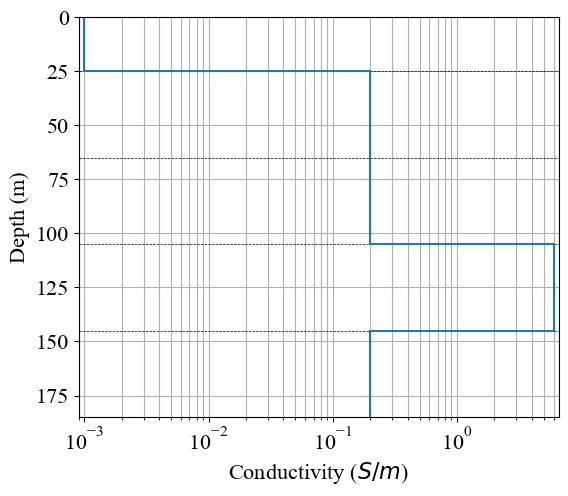

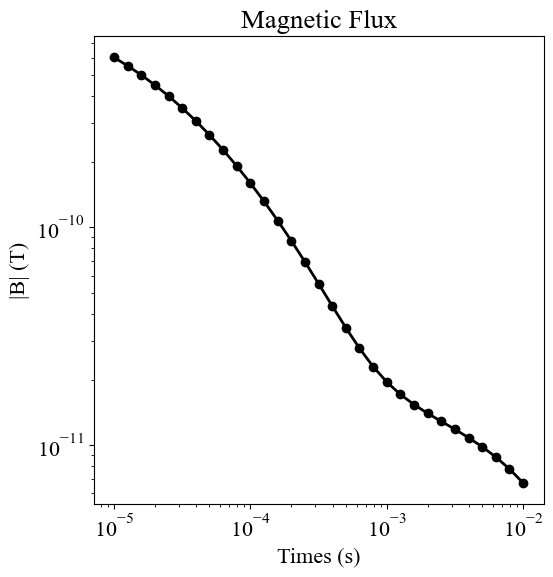

In [21]:
import numpy as np
import os
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
write_output = False
plt.rcParams.update({"font.size": 16})
source_location = np.array([0.0, 0.0, 1])
source_orientation = "z" 
source_current = 3.0  
source_radius = 10.0 
receiver_location = np.array([0.0, 0.0, 1])
receiver_orientation = "z" 
times = np.logspace(-5, -2, 31)  
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)
waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]
survey = tdem.Survey(source_list)
background_conductivity = 0.2
layer_conductivity = 6
layer2_conductivity = 0.001
thicknesses = np.array([25.0, 40.0, 40, 40])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[0] = layer2_conductivity
model[3] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
thicknesses_for_plotting = np.r_[thicknesses, 40.0]
fig = plt.figure(figsize=(6, 5))
plt.rcParams.update({
    "font.size": 16,
    "font.family": "Times New Roman"
})
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
plot_1d_layer_model(thicknesses_for_plotting, model, ax=ax,scale="log", show_layers=True)
ax.grid(which="both")
ax.set_xlabel(r"Conductivity ($S/m$)")
plt.gca()
simulation = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
)
dpred = simulation.dpred(model)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.2, 0.15, 0.75, 0.78])
ax.loglog(times, dpred, "k-o", lw=2)
ax.set_xlabel("Times (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Magnetic Flux")